### Airbnb New York City Data Analysis
The data set, containing information about Airbnb descriptions and ratings in New York City, was imported from http://insideairbnb.com/get-the-data.html on 2021-05-02. Using this data set, I try to answer the most important question of a potential host: what should a host do to obtain high ratings from the customers? 

As shown in the website of Airbnb, each customer is suggested to rate in seven aspects, being 'rating', 'cleanliness', 'communication', 'accuracy', 'checkin', 'location', and 'value'. I try to answer the following three questions:
1. Which neighborhood has a high rating in 'location'?
2. Will the ratings be higher, if the host lives in the same neighborhood where the listing is?
3. Overall, what is most important if a host wants to achieve a high overall rating?



In [195]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x) # display settings
pd.options.display.max_columns = None
pd.options.display.max_rows = 50

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer

import seaborn as sns
sns.set_style("whitegrid")

import matplotlib.pyplot as plt
%matplotlib inline

# read in the dataset containing full descriptions and average review score
df = pd.read_csv('./listings.csv')
print(df.columns)
df.head()

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20210407173759,2021-04-09,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,within a few hours,87%,24%,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, United States",Midtown,Manhattan,40.75356,-73.98559,Entire apartment,Entire home/apt,2,NaN,1 bath,NaN,1.0,"[""Refrigerator"", ""Essentials"", ""Cleaning befor...",$150.00,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,30,60,90,365,2021-04-09,48,0,0,2009-11-21,2019-11-04,94.0,9.0,9.0,10.0,10.0,10.0,9.0,NaN,f,3,3,0,0,0.35
1,3831,https://www.airbnb.com/rooms/3831,20210407173759,2021-04-12,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,within an hour,83%,94%,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Brooklyn, New York, United States",Bedford-Stuyvesant,Brooklyn,40.68494,-73.95765,Entire guest suite,Entire home/apt,3,NaN,1 bath,1.0,3.0,"[""Bathtub"", ""Smoke alarm"", ""Dishes and silverw...",$76.00,1,730,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,1,12,26,198,2021-04-12,396,80,2,2014-09-30,2021-03-19,89.0,10.0,9.0,9.0,10.0,10.0,10.0,NaN,f,1,1,0,0,4.98
2,5121,https://www.airbnb.com/rooms/5121,20210407173759,2021-04-09,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,Garon,2009-02-03,"New York, New York, United States","I am an artist(painter, filmmaker) and curato...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/72a61...,https://a0.muscache.com/im/pictures/user/72a61...,Bedford-Stuyvesant,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,NaN,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in apartment,Private room,2,NaN,NaN,1.0,1.0,"[""Kitchen"", ""Heating"", ""Wifi"", ""Long term stay...",$60.00,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,30,60,90,365,2021-04-0

### Data cleansing

Before we look into detailed data, we drop some columns that would not help us answer our questions. The columns that are dropped here can be divided into two types: 
- the column contains obviously redundant information, e.g. 'neighbourhood' is dropped because we already have 'neighbourhood_cleansed', 'latitude' and 'longitude' are dropped because we already know about the neighbourhood;
- the column contains irrelevant information, including 'id', 'listing_url', 'scrape_id', 'picture_url', 'host_name' (I assume that a potential customer does not make decisions based on the host's name), 'host_id', 'host_url', 'host_thumbnail_url', 'host_picture_url', 'calendar_updated', 'calendar_last_scraped'.

In [196]:
# drop the columns that would not help us answer our questions
no_use_cols = ['id', 'listing_url', 'scrape_id', 'picture_url', 
               'host_name', 'host_id', 'host_url', 'host_thumbnail_url', 'host_picture_url', 
               'neighbourhood', 'latitude', 'longitude', 'calendar_updated',
               'calendar_last_scraped']
df = df.drop(columns=no_use_cols, axis=1)

# then drop the columns that contain only NaN values
df = df.dropna(axis=1, how='all')

After dropping columns that are not helpful for us, we check the shape of the dataframe, as well as the names of 'object' type columns and the names of the rest columns. 

In [197]:
print(f"""The number of rows and columns of the current data set is {df.shape},\n
          The object type columns are {list(df.select_dtypes(include=['object']).columns)},
          \n\n and the remainin36905g columns are {list(df.select_dtypes(exclude=['object']).columns)}.
          """)

The number of rows and columns of the current data set is (36905, 58),

          The object type columns are ['last_scraped', 'name', 'description', 'neighborhood_overview', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'bathrooms_text', 'amenities', 'price', 'has_availability', 'first_review', 'last_review', 'instant_bookable'],
          

 and the remainin36905g columns are ['host_listings_count', 'host_total_listings_count', 'accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availabili

As we can see from the column names, some of the 'object'-type columns are not categorical. We convert and thus correct their data types. Note that we make the following assumptions.
 - For the 'datetime' columns, we convert them to the numbers of days up to the last scraping day, because we only care about the length of the duration instead of the specific dates. We don't want to do a time series analysis, because our questions are not about trends.
 - For columns containing descriptive information given by hosts (including 'name', 'description', 'neighborhood_overview', 'host_about'), we simply assume that only the length of the description matters. Therefore, we convert those strings into their lengths. Note that some strings might containing not only words, but also HTML formatting codes. We ignore this nuance and just count the lengths. 
 - For the 'bathrooms_text' column, we extract information on the number of bathrooms and whether the bathroom(s) is shared or private.

In [198]:
# convert columns containing dates to be of type 'datetime'
# then convert them into the number of days from that date to last_scraped
# the col_dates columns then contain int type of data
df['last_scraped'] = pd.to_datetime(df['last_scraped']) # set reference date
col_dates = list(('host_since', 'first_review', 'last_review')) # the list of columns containing dates
for col in col_dates:
    df[col] = pd.to_datetime(df[col]) # convert the types
    df[col] = (df['last_scraped'] - df[col]).dt.days # calculate the number of days up to the last scraping day

# convert columns containing percentages to be of type 'float'
col_percentages = list(('host_response_rate', 'host_acceptance_rate'))
for col in col_percentages:
    try:
        df[col] = df[col].str.rstrip('%').astype('float') / 100.0
    except:
        continue
        
# convert the column containing prices to be of type 'float'
df['price'] = df['price'].str.replace(',', '').str.replace('$', '').astype('float')

# convert columns containing 't''f' to 'True''False'
col_booleans = list(('host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable'))
for col in col_booleans:
    try:
        df[col] = df[col].replace('t', True)
        df[col] = df[col].replace('f', False)
    except:
        continue

# convert descriptive columns to the numbers of letters contained
col_descriptive = list(('name', 'description', 'neighborhood_overview', 'host_about'))
for col in col_descriptive:
    if type(df[col][0]) is str:
        df[col] = df[col].str.len()
    else:
        continue    
    
# convert the 'bathrooms_text' column to numbers of bathrooms + dummy variables containing 'shared'/'private' information
bathrooms_num = np.zeros(df.shape[0])
bathrooms_shared = np.zeros(df.shape[0])
bathrooms_private = np.zeros(df.shape[0])
for i in np.arange(df.shape[0]):
    if type(df['bathrooms_text'][i]) == str: # if not string, then the entry is 'NaN' of type float, which I just ignore
        for term in df['bathrooms_text'][i].split():
            term = term.lower()
            if '0' not in term: # if there is 0 bathroom, then it doesn't matter if it's 'shared' or 'private'
                if 'half' in term:
                    bathrooms_num[i] = 0.5
                if 'shared' in term: 
                    bathrooms_shared[i] = 1
                if 'private' in term:
                    bathrooms_private[i] = 1
                try:
                    bathrooms_num[i] = float(term)
                except ValueError:
                    continue
df = df.drop(columns = ['bathrooms_text'], axis = 1)
df['bathrooms_num'] = bathrooms_num
df['bathrooms_shared'] = bathrooms_shared
df['bathrooms_private'] = bathrooms_private

After we correct the data types, we check how the current dataframe looks like: 
- What's the shape of our dataframe? 
- How many object-type / numerical-type columns are there? 
- Do we need to further clean the categorical columns?

In [199]:
# drop the 'last_scraped' column, as it does not help us with the analysis
df = df.drop(columns = ['last_scraped'], axis = 1)

# check the current column types
print(f"""The number of rows and columns of the current data set is {df.shape},\n
          The object type columns are {list(df.select_dtypes(include=['object']).columns)},
          \n\n and the remaining columns are {list(df.select_dtypes(exclude=['object']).columns)}.
          """)

# check whether the categorical columns need to be cleaned
df.select_dtypes(include=['object']).head()

The number of rows and columns of the current data set is (36905, 59),

          The object type columns are ['host_location', 'host_response_time', 'host_is_superhost', 'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'amenities'],
          

 and the remaining columns are ['name', 'description', 'neighborhood_overview', 'host_since', 'host_about', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 'accommodates', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_re

,host_location,host_response_time,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,amenities
0,"New York, New York, United States",within a few hours,False,Midtown,"['email', 'phone', 'reviews', 'offline_governm...",True,True,Midtown,Manhattan,Entire apartment,Entire home/apt,"[""Refrigerator"", ""Essentials"", ""Cleaning befor..."
1,"New York, New York, United States",within an hour,False,Clinton Hill,"['email', 'phone', 'reviews', 'offline_governm...",True,True,Bedford-Stuyvesant,Brooklyn,Entire guest suite,Entire home/apt,"[""Bathtub"", ""Smoke alarm"", ""Dishes and silverw..."
2,"New York, New York, United States",NaN,False,Bedford-Stuyvesant,"['email', 'phone', 'facebook', 'reviews', 'off...",True,True,Bedford-Stuyvesant,Brooklyn,Private room in apartment,Private room,"[""Kitchen"", ""Heating"", ""Wifi"", ""Long term stay..."
3,"New York, New York, United States",within a few hours,False,Greenwood Heights,"['email', 'phone', 'reviews']",True,False,Sunset Park,Brooklyn,Entire apartment,Entire home/apt,"[""Kitchen"", ""Cable TV"", ""TV"", ""Carbon monoxide..."
4,"New York, New York, United States",within a day,False,Hell's Kitchen,"['email', 'phone', 'facebook', 'reviews']",True,False,Midtown,Manhattan,Private room in apartment,Private room,"[""Heating"", ""Bed linens"", ""TV"", ""Iron"", ""Free ..."


We still need to clean some categorical columns, before converting them into dummy variable columns in the usual way (i.e., to create one dummy variable column for each option in one categorical column). After several trials, I decide to do the following:
- For the column 'host_verifications', where each entry contains several categorical values, I split each entry into options and create dummy variables for each option. I find that [this blog post](https://shravan-kuchkula.github.io/nyc-airbnb-feature-engineering/#create-features-from-amenities-values) is a very nice reference on how to do this.
- For the column 'amenities', I intended to do the above, but then realized that there are too many messy options in this column. If I just do the above, this column will give 1062 dummy variable columns, and many options just occur for <10 times. I tried an additional step, which is to remove many characters including numbers to clean up messy options, but the number of dummies remains to be as high as 776. In Question 3 where I fit a linear regression model, these columns ruin the model by adding too much variance. I therefore delete all dummy columns with sum < 100, where this 100 is purely arbitrary. This gives in total only 111 'amenities'-related dummy columns.
- For the column 'property_type', each entry just contains one option, so I could just create dummy columns for all options. I tried, but this created 76 columns among which many contain repetative information (I mean, is it really necessary to create four very sparse dummy columns for 'Shared room in loft', 'Shared room in apartment', 'Private room in loft', 'Private room in apartment'? I would choose to focus on five features 'shared', 'private', 'loft', 'apartment', 'room' instead.) Therefore for this column, I use an NLP tool TfidfVectorizer to create a feature matrix, which adds only 28 columns to the original dataframe. The aforementioned blog post again helps a lot.
- For the column 'host_location', I convert 'host_location' to just one column 'host_location_in_newyork' (=1 if host location contains 'New York', =0 otherwise) to avoid dealing with 1392 different host locations. The justification for doing so is that I assume potential visitors do not particularly care about where the 'host_location' is, but just whether the 'host_location' is in New York, given that the visitors also have knowledge of where the 'host_neighbourhood' is.
- For the column 'host_neighbourhood', I compare it with the column 'neighbourhood_cleansed' and create one dummy variable column 'host_guest_neighbourhood' which =1 if 'host_neighbourhood' and 'neighbourhood_cleansed' are the same, =0 otherwise. This practice generates just one dummy column, instead of 414 sparse ones if I create one dummy for each option in the usual way. The justification for doing so is that I assume the potential guest only cares about whether the host lives in the same neighbourhood as he/she does, but not the particular neighbourhood where the host lives in. 

The following cells deal with 'host_verifications' and 'amenities'. A function is firstly defined and then used to clean the columns.

In [200]:
# a function to return all possible options contained in the column, clean the entries in the column,
# and create a dummy matrix to store the occurences of options in the column
def options_corpus_dummy(df, col, splitter=','):
    """
    A function to turn columns whose entries contain multiple options to dummy columns, where each dummy column indicates
    whether one option is present in that original entry.
    
    Input:
    df - the dataframe
    col - type str, the name of the column that we need to split into tokens
    splitter - the splitter in the entries of col, which is set to be ','
    
    Output:
    options_idx - type dict, a dictionary of options contained in col, e.g. in 'host_verifications' it should contain 'email' as an option
    corpus - type list, a list whose entries are the entries of the original col, except that .lower() and .split(split) are applied
    col_features - a dataframe whose (i,j)-th entry is 1 if the i-th row of col contains the j-th option in options_idx
    """

    col = df[col].apply(lambda x: x[1:-1]) # remove the square brackets in each entry
    options_idx ={} # a dictionary to store options, the keys are options
    idx = 0
    corpus = [] # a list whose entries are the entries of the original col, except that .lower() and .split(split) are applied
    for i in range(len(col)):
        items = col[i]
        items_lower = items.lower()
        options = items_lower.split(splitter) # splitted options in one entry
        j = 0 # iterator inside options
        for option in options:
            # remove nonsense characters and space. Note that I remove numbers, with the cost of losing information 
            # and the benefit of removing nonsense information, for example in 'amenities', there is an entry 
            # "wifi \\u2013 200 mbps", where that '200' is indeed useful information but '\\u2013' is nonsense. 
            # I choose to remove all numbers.
            option = option.translate({ord(c): None for c in ' \\\\""1234567890'}) 
            options[j] = option
            j = j + 1
            if option not in options_idx:
                options_idx[option] = idx
                idx  = idx + 1
        corpus.append(options)
        
    dummy_matrix = np.zeros((len(corpus), len(options_idx)))
    i = 0
    for options in corpus: # for each splitted entry in the original column
        dummy = np.zeros(len(options_idx)) # create a dummy vector, length = number of possible options
        for option in options: # for each option listed in the splitted entry
            idx = options_idx[option] # get the index for each option
            dummy[idx] = 1 # put 1 at the corresponding indices of the dummy vector
        dummy_matrix[i, :] = dummy # record this dummy vector in the dummy matrix
        i = i+1
    
    col_features = pd.DataFrame(dummy_matrix, columns=list(options_idx.keys())) # create a dataframe to store the dummy matrix with options
    #col_features.columns = [col + '_' + item for item in list(col_features.columns)] # I don't know why this doesn't work in function...
    
    return options_idx, corpus, col_features

In [201]:
print(f'Before applying the function to create dummies, the dataframe has shape {df.shape}.')

# apply the above function to the column 'host_verifications'
options_idx_verifications, corpus_verifications, dummy_verifications = options_corpus_dummy(df, 'host_verifications', ',')
dummy_verifications.columns = ['host_verifications' + '_' + item for item in list(dummy_verifications.columns)]
print(f'The shape of dummy_verifications is {dummy_verifications.shape}.')
for col in dummy_verifications:
    if np.sum(dummy_verifications[col]) <= 50:
        del dummy_verifications[col]
print(f'The shape of dummy_verifications, after removing columns with sum <= 50, is {dummy_verifications.shape}.')

Before applying the function to create dummies, the dataframe has shape (36905, 59).
The shape of dummy_verifications is (36905, 21).
The shape of dummy_verifications, after removing columns with sum <= 50, is (36905, 15).


In [202]:
# apply the above function to the column 'amenities'
# remove all dummy columns with sum less than or equal to 100
options_idx_amenities, corpus_amenities, dummy_amenities = options_corpus_dummy(df, 'amenities', ',')
dummy_amenities.columns = ['amenities' + '_' + item for item in list(dummy_amenities.columns)]
print(f'The shape of all dummy_amenities is {dummy_amenities.shape}.')
for col in dummy_amenities:
    if np.sum(dummy_amenities[col]) <= 50:
        del dummy_amenities[col]
print(f'The shape of dummy_amenities, after removing columns with sum <= 50, is {dummy_amenities.shape}.')

# drop 'host_verifications' and 'amenities' and append the dummy dataframe
df = df.drop(columns = ['host_verifications', 'amenities'], axis=1)
df = pd.concat([df, dummy_verifications], axis=1)
df = pd.concat([df, dummy_amenities], axis=1)
print(f'The current dataframe shape is {df.shape}.') 

The shape of all dummy_amenities is (36905, 766).
The shape of dummy_amenities, after removing columns with sum <= 50, is (36905, 133).
The current dataframe shape is (36905, 205).


In [203]:
# just to see what are the remaining amenities
np.sum(dummy_amenities).sort_values()

amenities_hbomax                                 53.0
amenities_dedicatedworkspace:desk                53.0
amenities_freedryeruinunit                       54.0
amenities_freewasheruinunit                      57.0
amenities_hdtv                                   59.0
amenities_clothingstorage:dresserandcloset       60.0
amenities_bidet                                  62.0
amenities_hdtvwithamazonprimevideo               62.0
amenities_mosquitonet                            63.0
amenities_amazonprimevideo                       68.0
amenities_dryeruinbuilding                       69.0
amenities_lakeaccess                             71.0
amenities_clothingstorage:closetanddresser       71.0
amenities_washeruuainbuilding                    73.0
amenities_stainlesssteelgasstove                 81.0
amenities_centralairconditioning                 84.0
amenities_radiantheating                         85.0
amenities_wifiumbps                              85.0
amenities_netflix           

The following cell deals with the column 'property_type'.

In [204]:
# for the column 'property_type', I use TfidfVectorizer to create a feature matrix to substitute it
tfidf_vectorizer = TfidfVectorizer(min_df=50, stop_words='english')
tfidf_feature_matrix = tfidf_vectorizer.fit_transform(df['property_type'])
feature_matrix_df = pd.DataFrame(tfidf_feature_matrix.toarray(), 
                                 columns=tfidf_vectorizer.get_feature_names())
feature_matrix_df.columns = feature_matrix_df.add_prefix('property_type_contains_').columns
print(feature_matrix_df.shape, df.shape)
feature_matrix_df.describe()

df = pd.concat( [df.drop(columns = ['property_type'], axis = 1), feature_matrix_df], axis = 1 )
print(f'After substituting the column property_type by a feature matrix, the dataframe shape is {df.shape}.')

(36905, 15) (36905, 205)
After substituting the column property_type by a feature matrix, the dataframe shape is (36905, 219).


The following cells deal with the columns 'host_location' and 'host_neighbourhoods'. They also create a data frame called 'compare_neighbourhoods' which contains neighbourhood information of both hosts and airbnb houses, as well as review scores, which will be used in my 2nd question.

In [205]:
# store the original 'host_neighbourhood' and 'neighbourhood_cleansed' columns, 
# as well as all review scores, since I will use them in my 2nd question
compare_neighbourhoods = df[['host_neighbourhood', 'neighbourhood_cleansed', 
                             'review_scores_rating', 'review_scores_accuracy',
                             'review_scores_cleanliness', 'review_scores_checkin',
                             'review_scores_communication', 'review_scores_location',
                             'review_scores_value']]

# convert 'host_location' to one dummy column, according to whether it's in New York
in_newyork = df['host_location'].str.contains('New York')
df['host_location_newyork'] = in_newyork
df = df.drop(columns = ['host_location'], axis = 1)

# compare 'host_neighbourhood' and 'neighbourhood_cleansed', create a dummy column which =1 if these two are the same, =0 otherwise
host_guest_neighbourhood = np.zeros(df.shape[0])
for i in np.arange(df.shape[0]):
    if df['host_neighbourhood'][i] == df['neighbourhood_cleansed'][i]:
        host_guest_neighbourhood[i] = 1 # host lives in the same neighbourhood as the guest
df['host_guest_neighbourhood'] = host_guest_neighbourhood
df = df.drop(columns = ['host_neighbourhood'], axis = 1)

# print current dataframe shape after creating these custom dummy variables
print(f'Before the usual conversion of categorical columns, the dataframe has shape {df.shape}. The column names are: ')
print(df.columns.tolist())

Before the usual conversion of categorical columns, the dataframe has shape (36905, 219). The column names are: 
['name', 'description', 'neighborhood_overview', 'host_since', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'room_type', 'accommodates', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review

In [206]:
# create dummy variables for categorical columns and drop the original ones
# create two dataframes, 'df' containing these dummies with drop_first=True (for linear regression),
# 'df_compare' containing dummies with drop_first=False (for my Question 1 and 2 where I need all data)
col_categorical = list(df.select_dtypes(include=['object']).columns)
df_compare = df
for col in col_categorical:
    df = pd.concat([df.drop(columns=col, axis=1), pd.get_dummies(df[col],prefix=col,prefix_sep='_',drop_first=True,dummy_na=False)],axis=1)
    df_compare = pd.concat([df_compare.drop(columns=col, axis=1), pd.get_dummies(df_compare[col],prefix=col,prefix_sep='_',drop_first=False,dummy_na=False)],axis=1)

print(f"""The number of rows and columns of df (drop_first=True) is {df.shape},\n
          The object type columns are {list(df.select_dtypes(include=['object']).columns)}.""")
print(f"""The number of rows and columns of df_compare (drop_first=False) is {df_compare.shape},\n
          The object type columns are {list(df_compare.select_dtypes(include=['object']).columns)}.""")

The number of rows and columns of df (drop_first=True) is (36905, 444),

          The object type columns are [].
The number of rows and columns of df_compare (drop_first=False) is (36905, 452),

          The object type columns are [].


Note that we have not dealt with the missing values in numerical columns. We check the proportions of missing values in the numerical columns, then impute the missing values by the mean of the column. We do this to all columns with NaN values except the columns on ratings, including 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', because those are our potential response vectors.

The proportions of NaN values in numerical columns are (only the nonzero ones): 
 
      name                           0.000352
maximum_nights_avg_ntm         0.000352
minimum_nights_avg_ntm         0.000352
maximum_maximum_nights         0.000352
maximum_minimum_nights         0.000352
minimum_minimum_nights         0.000352
minimum_maximum_nights         0.000352
beds                           0.015689
host_listings_count            0.034358
host_since                     0.034358
description                    0.034358
host_total_listings_count      0.034358
bedrooms                       0.099553
first_review                   0.263379
last_review                    0.263379
reviews_per_month              0.263379
review_scores_rating           0.282049
review_scores_cleanliness      0.282428
review_scores_communication    0.282645
review_scores_accuracy         0.282726
review_scores_checkin          0.282997
review_scores_value            0.283024
review_scores_location         

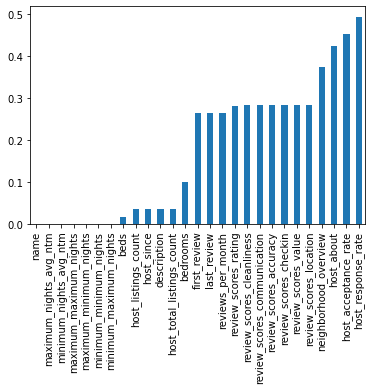

In [207]:
# plot the proportions of NaN values in the columns that contain NaN values
df_col_nan = df[df.columns[df.isnull().sum() != 0]]
print(f'''The proportions of NaN values in numerical columns are (only the nonzero ones): \n 
      {(df_col_nan.isnull().sum()/df_col_nan.shape[0]).sort_values()}''')
(df_col_nan.isnull().sum()/df_col_nan.shape[0]).sort_values().plot(kind='bar')

In [208]:
# use the column mean to impute the missing values in df_contain_nan, all ratings columns excluded
df_col_nan_no_ratings = df_col_nan.drop(columns = ['review_scores_rating', 'review_scores_accuracy', 
                                                   'review_scores_cleanliness', 'review_scores_checkin', 
                                                   'review_scores_communication', 'review_scores_location', 
                                                   'review_scores_value'], axis=1)
fill_mean = lambda col:col.fillna(col.mean())
df = pd.concat([df.drop(columns = df_col_nan_no_ratings.columns, axis=1), df_col_nan_no_ratings.apply(fill_mean, axis=0)], axis=1)
print(f'After imputing the missing values, the shape of df is {df.shape}, which is the same as before.')

After imputing the missing values, the shape of df is (36905, 444), which is the same as before.


Now, we have cleansed the data set and are ready for the analsis.

### Question 1: Where should I host an Airbnb to gain a high rating in 'location'?

To answer this question, we plot the average 'review_scores_location' against the neighborhood information, to see in which neighborhood a potential Airbnb host could attract higher location ratings. We do this both for general neighborhoods, including just Brooklyn, Manhattan, Queens, and Staten Island, and for detailed neighborhoods, such as Bedford-Stuyvesant and Brooklyn Heights. We first define the following function for this purpose.

In [209]:
# create list of column names containing neighborhood information
col_neighbourhood_group_cleansed = [col for col in df_compare.columns if 'neighbourhood_group_cleansed' in col]
col_neighbourhood_cleansed = [col for col in df_compare.columns if 'neighbourhood_cleansed' in col]

# drop rows with NaN in review_scores_location
df_new = df_compare.dropna(subset=['review_scores_location'], axis=0)

def rate_neighbourhood(df, col_list, rate):
    """
    Input:
    df - the dataframe containing neighbourhood and location ratings information
    col_list - type list, the list of neighbourhood names
    rate - type str, the name of the concerned rating
    
    Output:
    rates - a dataframe with two columns, 'mean' containing the mean of the ratings, 'std' containing the standard deviations
    rates_plot - a bar chart of the average ratings with standard deviations as black short lines
    """
    
    rate_mean = np.zeros(len(col_list)) # create array to hold mean and standard deviation of ratings in the neighborhoods
    rate_std = np.zeros(len(col_list))
    col_list_short = [None] * len(col_list) # a list to hold the neighborhood names
    col_drop = []
    i = 0
    j = -1
    for col in col_list:
        j = j + 1 # keep record of the index of col in col_list
        if np.sum(df[col]) < 200: # we only consider neighborhoods with at least 200 Airbnbs
            rate_mean = rate_mean[:-1]
            rate_std = rate_std[:-1]
            col_list_short = col_list_short[:-1]
            col_drop.append(col)
        else:
            # create a masked array, so that rating_neighborhood contains only ratings of one neighborhood col
            rate_neighborhood =  np.ma.masked_array(df[rate].values, 
                                                 mask = (~df[col].astype(bool)).astype(int))
            rate_mean[i] = np.mean(rate_neighborhood)
            rate_std[i] = np.std(rate_neighborhood)
            col_list_short[i] = col_list[j].split('_')[-1]
            i = i + 1 # keep record of the index of recorded neighborhoods
    
    rates = pd.DataFrame( # a dataframe to store the means and stds with corresponding neighborhood names
        {
            'mean': rate_mean,
            'std': rate_std
        },
        index = col_list_short
    )
    rates = rates.sort_values(by = 'mean', ascending = True)
    
    rates_plot = rates.plot(kind = "barh", y = "mean", xerr = 'std', legend = False, title = "Average review scores on location", figsize=(8,8))
    rates_plot.set_xlabel('Review Scores on Location')
    return rates, rates_plot

As shown in the following plot, Manhattan has the highest averate scores in location, followed by Staten Island, Brooklyn, and Queens. However, the differences are not significant, as all scores have pretty large standard deviations.

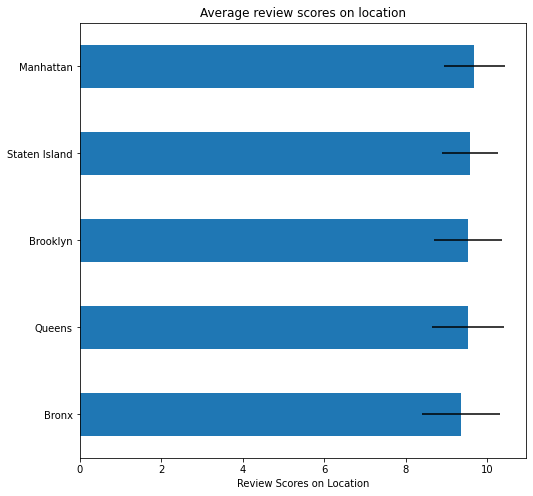

In [210]:
neighbourhood_group_rates, neighbourhood_group_plot = rate_neighbourhood(df_new, col_neighbourhood_group_cleansed, 'review_scores_location')

As shown in the following plot, among the neighborhoods which have more than 200 Airbnb stays, the top 5 neighborhoods are Park Slope, West Village, Upper West Side, Chelsea, and East Village. But still, the differences of scores among the plotted neighborhoods are not significant, again because of large standard deviations. What could be inferred, probably, is that Park Slope and West Village are indeed the best neighborhoods from the perspective of visitors, since they achieve high average ratings in location with small standard deviations.

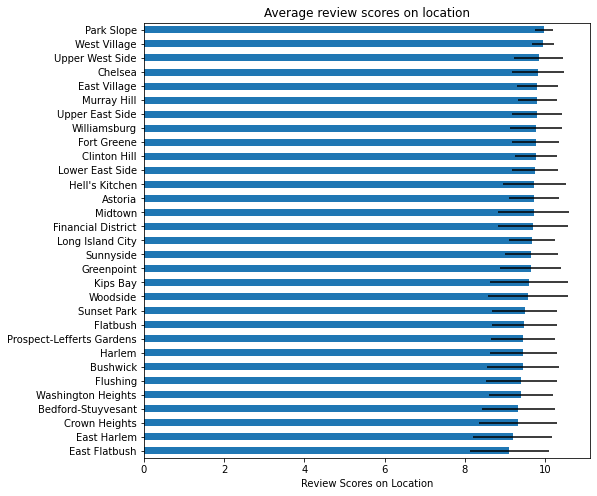

In [211]:
neighbourhood_rates, neighbourhood_plot = rate_neighbourhood(df_new, col_neighbourhood_cleansed, 'review_scores_location')

### Question 2: Should I host Airbnb in the same neighborhood where I live?

Intuitively, a host living in the same neighborhood with the visitors could provide more prompt services and more local experiences for visitors, thus should be preferred. Let's see if this hypothesis is true. I divide all listings into two groups by whether the host's neighborhood and the listing's neighborhood are the same, then compare their average ratings in seven aspects.

In [212]:
# drop the listings with NaN in ratings and neighbourhood information
col_rates = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
           'review_scores_communication', 'review_scores_location', 'review_scores_value']
compare_neighbourhoods_dropna = compare_neighbourhoods.dropna(axis = 0).reset_index()
i = 0
count = 0
for i in np.arange(compare_neighbourhoods_dropna.shape[0]):
    if compare_neighbourhoods_dropna['host_neighbourhood'][i] == compare_neighbourhoods_dropna['neighbourhood_cleansed'][i]:
        count += 1
print(f'Among {compare_neighbourhoods_dropna.shape[0]} listings, {count} listings have the host living in the same neighbourhood.')

Among 21309 listings, 15556 listings have the host living in the same neighbourhood.


Differences of scores between listings with hosts in same neighbourhoods and those with hosts in different neighbourhoods are 
review_scores_value            0.101776
review_scores_location         0.006844
review_scores_communication    0.077942
review_scores_checkin          0.034360
review_scores_cleanliness      0.008965
review_scores_accuracy         0.075261
review_scores_rating           0.059241
dtype: float64


,same_neighbourhood,different_neighbourhood,same_neighbourhood_std,different_neighbourhood_std
review_scores_value,9.401967,9.300191,0.957489,1.100114
review_scores_location,9.597840,9.590996,0.779910,0.821091
review_scores_communication,9.743507,9.665566,0.774472,0.975677
review_scores_checkin,9.741643,9.707283,0.774392,0.860015
review_scores_cleanliness,9.281692,9.272727,1.117994,1.166862
review_scores_accuracy,9.618282,9.543021,0.887666,0.992200
review_scores_rating,9.402957,9.343716,0.909413,1.028127


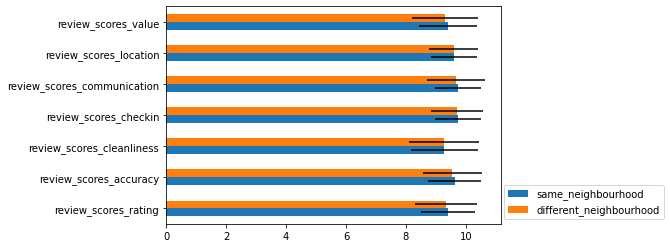

In [213]:
# notice that among the scores, 'review_scores_rating' is out of 100, while all other scores are out of 10
# I rescale 'review_scores_rating' to be out of 10
compare_neighbourhoods_dropna['review_scores_rating'] = compare_neighbourhoods_dropna['review_scores_rating']/10

# group listings by whether host neighborhood equals listing neighborhood
compare_group = compare_neighbourhoods_dropna.groupby(compare_neighbourhoods_dropna['host_neighbourhood'] == compare_neighbourhoods_dropna['neighbourhood_cleansed'])

same_mean = np.zeros(len(col_rates)) # store the means of 7 scores of listings with hosts and guests in the same neighborhoods
same_std = np.zeros(len(col_rates))
diff_mean = np.zeros(len(col_rates)) # store the means of 7 scores of listings with hosts and guests in different neighborhoods
diff_std = np.zeros(len(col_rates))
i = 0
for rate in col_rates:
    same_mean[i] = np.mean(compare_group.get_group(True)[rate])
    same_std[i] = np.std(compare_group.get_group(True)[rate])
    diff_mean[i] = np.mean(compare_group.get_group(False)[rate])
    diff_std[i] = np.std(compare_group.get_group(False)[rate])
    i = i + 1
compare_rates = pd.DataFrame(
    {
        'same_neighbourhood': same_mean,
        'different_neighbourhood': diff_mean
    },
    index = col_rates 
)
compare_rates_plot = compare_rates.plot(kind = 'barh', xerr = [same_std, diff_std])
compare_rates_plot.legend(loc='center right', bbox_to_anchor=(1.5, 0.1))
compare_rates['same_neighbourhood_std'] = same_std
compare_rates['different_neighbourhood_std'] = diff_std
# reverse the display so that the order is the same as in the horizontal bar plot
print(f'''Differences of scores between listings with hosts in same neighbourhoods and those with hosts in different neighbourhoods are 
{(compare_rates['same_neighbourhood']-compare_rates['different_neighbourhood']).iloc[::-1]}''')

compare_rates.iloc[::-1] 

As shown in the above chart and plot, if a listing has the host living in the same neighbourhood, then it receives high average scores in all aspects, and the standard deviations are also smaller. The difference in the average values is less evident in scores on location and cleaniness, which is intuitive because the guests' levels of satisfaction of location and cleaniness should possibly be less related to where the hosts live. However, note that all differences are not significant, again because of large standard deviations.

### Question 3: What should a host do to obtain high overall ratings?
To answer this question, I run a linear regression of 'review_scores_rating' on all others (excluding the other six reviews). I define a function of linear regression first, then try to work on the data set directly.

In [214]:
def fit_lm(df, col_y, test_size = .3, random_state = 42):
    """
    A function to split the data set into training and testing sets, fit a linear regression model, and output the training and testing
    sets, the linear regression model, the R2 scores of training and testing sets, and the coefficients.
    
    Input:
    df - the dataframe
    col_y - type str, the name of the response variable column
    test_size - used in train_test_split
    random_state - used in train_test_split
    
    Output:
    X_train, X_test, y_train, y_test - as suggested by names, the training sets and the testing sets of X and y
    train_score - R2 score of training data set
    test_score - R2 score of testing data set
    lm_model - the linear regression model
    coefs_df - a dataframe which stores coefficients of the model fit
    """
    # drop columns with all zeros
    df_new = df.loc[:, (df != 0).any(axis=0)]

    y = df_new[col_y]
    X = df_new.drop(columns = [col_y], axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)
    
    y_train_pred = lm_model.predict(X_train)
    y_pred = lm_model.predict(X_test)
    
    train_score = r2_score(y_train, y_train_pred)
    test_score = r2_score(y_test, y_pred)
    
    # a dataframe to hold all coefficients
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)

    return X_train, X_test, y_train, y_test, train_score, test_score, lm_model, coefs_df

In [215]:
# drop the other six specific ratings (because I don't want to use ratings to predict ratings) ,
# drop all rows with NaN in the overall rating,
df_new = df.drop(columns = ['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                        'review_scores_communication', 'review_scores_location', 'review_scores_value'], axis = 1)
df_new = df_new.dropna(subset = ['review_scores_rating'], axis = 0)

X_train, X_test, y_train, y_test, train_score, test_score, lm_model, coefs_df = fit_lm(df_new, 'review_scores_rating')
print(train_score, test_score)
coefs_df

0.13476058692148596 -8.374345892928952e+24


,est_int,coefs,abs_coefs
219,neighbourhood_cleansed_Castle Hill,-2253241635379667.50,2253241635379667.50
243,neighbourhood_cleansed_Douglaston,-714762329512055.25,714762329512055.25
357,neighbourhood_cleansed_Rosebank,325574601176093.62,325574601176093.62
274,neighbourhood_cleansed_Graniteville,119725202108413.70,119725202108413.70
402,neighbourhood_cleansed_Willowbrook,119725202108412.11,119725202108412.11
328,neighbourhood_cleansed_New Dorp,119725202108411.92,119725202108411.92
348,neighbourhood_cleansed_Randall Manor,119725202108411.22,119725202108411.22
220,neighbourhood_cleansed_Castleton Corners,119725202108410.42,119725202108410.42
287,neighbourhood_cleansed_Howland Hook,119725202108410.27,119725202108410.27
343,neighbourhood_cleansed_Port Richmond,119725202108410.05,119725202108410.05


Okay, so obviously the model doesn't work... I will further delete all 'neighbourhood_cleansed' columns, because they seem to be too sparse. We still have 'neighbourhood_group_cleansed' for the same (but more rough) information. Just trying.

In [216]:
df_new = df_new.drop(columns = [col for col in df.columns if 'neighbourhood_cleansed' in col])
print(df_new.shape)

X_train, X_test, y_train, y_test, train_score, test_score, lm_model, coefs_df = fit_lm(df_new, 'review_scores_rating')
print(train_score, test_score)
coefs_df

(26496, 219)
0.11962858010432509 0.0925200479076752


,est_int,coefs,abs_coefs
172,property_type_contains_guest,-125138073708563.86,125138073708563.86
181,property_type_contains_suite,125138073708557.05,125138073708557.05
205,host_listings_count,-42081437096.78,42081437096.78
206,host_total_listings_count,42081437096.78,42081437096.78
196,room_type_Shared room,-19.53,19.53
180,property_type_contains_shared,18.88,18.88
178,property_type_contains_room,-11.00,11.00
174,property_type_contains_hotel,-6.03,6.03
145,amenities_wifiumbps,4.79,4.79
171,property_type_contains_entire,-4.36,4.36


Now at least the r2 scores look more reasonable. Moreover, the coefficients seem to be on reasonable scales, except those for the top 4. BUt then, the top 4 seem to form two highly correlated pairs. Indeed, after checking the correlation, these two pairs are correlated with correlation 1. I drop one column out of each of these two pairs.

In [217]:
# calculate the correlation matrix
corr = df_new[['property_type_contains_guest', 'property_type_contains_suite', 'host_listings_count', 'host_total_listings_count']].corr()
corr

,property_type_contains_guest,property_type_contains_suite,host_listings_count,host_total_listings_count
property_type_contains_guest,1.00,1.00,-0.01,-0.01
property_type_contains_suite,1.00,1.00,-0.01,-0.01
host_listings_count,-0.01,-0.01,1.00,1.00
host_total_listings_count,-0.01,-0.01,1.00,1.00


In [218]:
# so let's drop 'property_type_contains_guest' and 'host_listings_count', then fit the model again
df_new = df_new.drop(columns = ['property_type_contains_guest', 'host_listings_count'], axis = 1)
print(df_new.shape)

X_train, X_test, y_train, y_test, train_score, test_score, lm_model, coefs_df = fit_lm(df_new, 'review_scores_rating')
print(train_score, test_score)
coefs_df

(26496, 217)
0.11962990911400673 0.09251957426961954


,est_int,coefs,abs_coefs
195,room_type_Shared room,-19.53,19.53
179,property_type_contains_shared,18.88,18.88
177,property_type_contains_room,-10.98,10.98
180,property_type_contains_suite,-6.84,6.84
173,property_type_contains_hotel,-6.03,6.03
145,amenities_wifiumbps,4.80,4.80
171,property_type_contains_entire,-4.36,4.36
32,host_verifications_on,4.14,4.14
54,amenities_wifi,4.08,4.08
146,amenities_breadmaker,-4.05,4.05


I plot the correlation heat map for the top 14 columns with large coefficients, just to check if there are still highly correlated columns among the top ones.

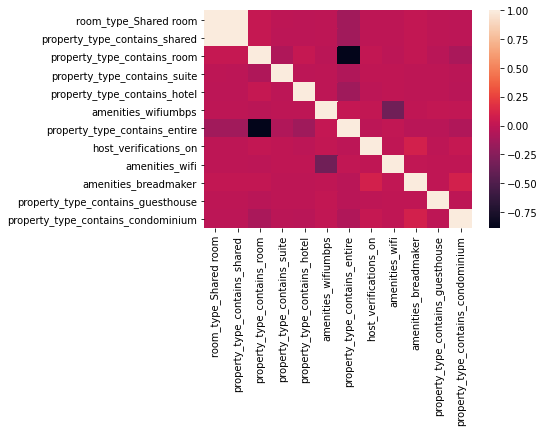

In [219]:
corr = df_new[['room_type_Shared room', 'property_type_contains_shared', 'property_type_contains_room', 'property_type_contains_suite',
              'property_type_contains_hotel', 'amenities_wifiumbps', 'property_type_contains_entire', 'host_verifications_on', 
               'amenities_wifi', 'amenities_breadmaker', 'property_type_contains_guesthouse', 'property_type_contains_condominium']].corr()
corr
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

Further checking shows a high correlation being 0.99659 between the top two columns 'room_type_Shared_room' and 'property_type_contains_shared'. But I will stop further modifying the data set. I don't have very nice results, as the R2 score of the training data set is roughly 0.12 and that of the testing data set is roughly 0.09, suggesting that my model does not have much predictability. At this point, I will just conclude by saying that a simple, standard linear regression model will not be sufficient to answer my question 'what should a host do to obtain high overall ratings'. 